## Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [6]:
df.duplicated().sum()

0

In [7]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam', metrics = ['accuracy'])

In [14]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 2s 52ms/step - loss: 0.0557 - accuracy: 0.0000e+00 - val_loss: 0.0313 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 0.0286 - accuracy: 0.0000e+00 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 18ms/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_loss: 0.0187 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0180 - accuracy: 0.0000e+00 - val_loss: 0.0148 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0136 - accuracy: 0.0000e+00 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 18ms/step - loss: 0.0108 - accuracy: 0.0000e+00 - val_loss: 0.0104 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 18ms/step - loss: 0.0098 - accuracy: 0.0000e

10/10 [==============================] - 0s 16ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 56/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 57/100
10/10 [==============================] - 0s 13ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 58/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 59/100
10/10 [==============================] - 0s 13ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 60/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 61/100
10/10 [==============================] - 0s 13ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - 

In [15]:
y_pred = model.predict(X_test_scaled)
y_pred

array([[0.64359283],
       [0.67754155],
       [0.99325883],
       [0.73240244],
       [0.79246956],
       [0.66243446],
       [0.7400189 ],
       [0.72166073],
       [0.7777769 ],
       [0.6626115 ],
       [0.6821651 ],
       [0.5389544 ],
       [0.784489  ],
       [0.7849929 ],
       [0.75959826],
       [0.8423435 ],
       [0.61411595],
       [0.7520551 ],
       [0.92048985],
       [0.6374271 ],
       [0.6454589 ],
       [0.76638937],
       [0.82499915],
       [0.5483379 ],
       [0.7870092 ],
       [0.55694383],
       [0.9121694 ],
       [0.65058106],
       [0.827614  ],
       [0.7087134 ],
       [0.63773555],
       [0.810857  ],
       [0.5982836 ],
       [0.87741566],
       [0.50282234],
       [0.7914763 ],
       [0.6936692 ],
       [0.6430158 ],
       [0.6620117 ],
       [0.8954525 ],
       [0.53361756],
       [0.6486878 ],
       [0.7378376 ],
       [0.9756209 ],
       [0.74345696],
       [0.51892513],
       [0.64843094],
       [0.625

In [16]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.800604932714815

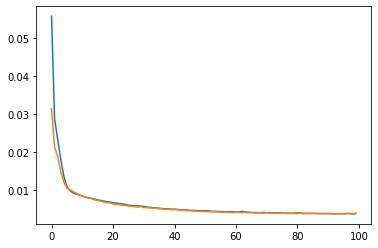

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

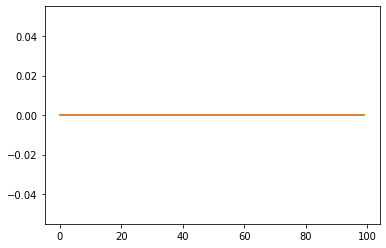

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])